### GeoPandas to Plot Coordinates 

The code below was used to plot the lat and long points of road closures with geopandas. This required a detailed shape file for the U.S. to show major roads, therefore this code was not used for the final project. 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point # Shapely used to help with geopandas
from matplotlib.pyplot import *
import seaborn as sns

In [3]:
#Read in the clean csv from the here.com
df = pd.read_csv('./Coordinates/all_locations_for_tableau.csv')

In [4]:
df

,LATITUDE,LONGITUDE,start_end,incident
0,35.716890,-77.644551,start,0
1,34.341570,-78.599610,start,1
2,35.772509,-77.993278,start,2
3,33.912340,-78.073370,start,3
4,35.973615,-77.450731,start,4
5,35.705970,-78.557370,start,5
6,35.095590,-77.478160,start,6
7,34.219480,-78.618100,start,7
8,35.550380,-78.220770,start,8
9,35.180720,-77.932360,start,9


In [5]:
#Function to get the geometry for the points 

def geo_(df):
    
    # zip the lat and long of a df with shapely to create the point in space
    geometry = [Point(xy) for xy in zip(df['LATITUDE'], df['LONGITUDE'])]
    
    crs = {'init': 'epsg:4326'}
    
    # using geopandas to match up our geometry with our coordinate system to create a new GeoDataFrame
    
    df = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)
    
    return df


In [6]:
#Lat and Long for start and end points of road closures 
roads = geo_(df)
roads

,LATITUDE,LONGITUDE,start_end,incident,geometry
0,35.716890,-77.644551,start,0,POINT (35.71689 -77.64455100000001)
1,34.341570,-78.599610,start,1,POINT (34.34157 -78.59961)
2,35.772509,-77.993278,start,2,POINT (35.772509 -77.993278)
3,33.912340,-78.073370,start,3,POINT (33.91234 -78.07337)
4,35.973615,-77.450731,start,4,POINT (35.973615 -77.450731)
5,35.705970,-78.557370,start,5,POINT (35.70597 -78.55736999999999)
6,35.095590,-77.478160,start,6,POINT (35.09559 -77.47816)
7,34.219480,-78.618100,start,7,POINT (34.21948 -78.6181)
8,35.550380,-78.220770,start,8,POINT (35.55038 -78.22077)
9,35.180720,-77.932360,start,9,POINT (35.18072 -77.93236)


In [7]:
roads.dtypes

LATITUDE     float64
LONGITUDE    float64
start_end     object
incident       int64
geometry      object
dtype: object

In [8]:
lat = list(roads['LATITUDE'])

In [9]:
long = list(roads['LONGITUDE'])

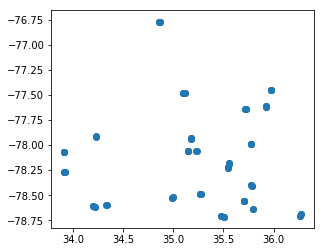

In [10]:
roads['geometry'].plot();

### Geopandas test 

In [13]:
gdf = gpd.GeoDataFrame(roads, geometry='geometry')

In [14]:
print(gdf.head())

    LATITUDE  LONGITUDE start_end  incident  \
0  35.716890 -77.644551     start         0   
1  34.341570 -78.599610     start         1   
2  35.772509 -77.993278     start         2   
3  33.912340 -78.073370     start         3   
4  35.973615 -77.450731     start         4   

                              geometry  
0  POINT (35.71689 -77.64455100000001)  
1           POINT (34.34157 -78.59961)  
2         POINT (35.772509 -77.993278)  
3           POINT (33.91234 -78.07337)  
4         POINT (35.973615 -77.450731)  


In [15]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [16]:
import matplotlib.pyplot as plt

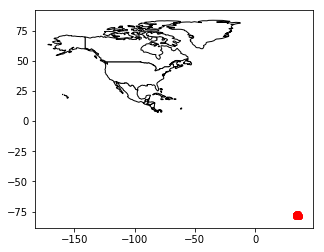

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# North America was the only option here
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [18]:
#Per the above, Geopandas is not accurate in this case. 